In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

#### 1.1. Load the required libraries and read the dataset. (1)

In [2]:
df=pd.read_csv(r"C:\Users\Tanush Sujoy\Downloads\renttherunway.csv")
df.head()

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


#### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features (2)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [4]:
df.shape

(192544, 16)

### From the above we can say that there are 16 columns and 192544 rows
### From the column we have 2 columns with float,4 columns with integers and 10 columns with categorical dtypes

 #### Data cleansing and Exploratory data analysis: [ Score: 20 point ]

### 3. Check if there are any duplicate records in the dataset? If any, drop them.(1)

In [5]:
len(df[df.duplicated()])

0

### There are no duplicated data records

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) (1)


In [6]:
df.drop(['review_text','review_summary','user_id','Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,review_date
0,fit,34d,2260466,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,34b,153475,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,NaN,1063761,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,34c,126335,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,34b,616682,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0,"September 26, 2016"


### Have dropped unnamed:0 as its used for numbering the data , and review text and summary have been   dropped as it gives review in detail and is not objective


 ### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (2)


In [8]:
def clean_weight(x):
    if isinstance(x,str):
         return(x.replace('lbs','').replace(',',''))
    return(x)
                  

In [9]:
df['weight']=df['weight'].apply(clean_weight)
df['weight']=df['weight'].astype('float')

In [10]:
df['weight'].head(5)

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'. (2)


In [11]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [12]:
df['rented for'] = df['rented for'].replace({'party: cocktail': 'party', np.nan: 'unknown'})

In [13]:
print('After updation:',df['rented for'].unique())

After updation: ['vacation' 'other' 'party' 'formal affair' 'wedding' 'date' 'everyday'
 'work' 'unknown']


###  7.The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. (3)


In [14]:
def convert_height(height):
    if isinstance(height,str):
        #split height into feet and inch
        feet,inches=map(int,height.replace('"','').split("'"))
        total_inches=(feet*12)+inches
        return float(total_inches)
    return height  #return height as it is if its not a string


In [15]:
df['height']=df['height'].apply(convert_height)
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

 ### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods(3)


In [16]:
df.isnull().sum()

fit                0
bust size      18411
item_id            0
weight         29982
rating            82
rented for         0
body type      14637
category           0
height           677
size               0
age              960
review_date        0
dtype: int64

In [17]:
df['bust size'].fillna(df['bust size'].mode()[0],inplace=True)
df['body type'].fillna(df['body type'].mode()[0],inplace=True)

In [18]:
df['weight'].fillna(df['weight'].median(),inplace=True)
df['rating'].fillna(df['rating'].median(),inplace=True)
df['height'].fillna(df['height'].median(),inplace=True)
df['age'].fillna(df['age'].median(),inplace=True)

In [19]:
df.isnull().sum()

fit            0
bust size      0
item_id        0
weight         0
rating         0
rented for     0
body type      0
category       0
height         0
size           0
age            0
review_date    0
dtype: int64

### 9. Check the statistical summary for the numerical and categorical columns and write your findings. (3)


In [20]:
#statistical summary for numerical columns
stats_numerical=df.describe()
stats_numerical

,item_id,weight,rating,height,size,age
count,1.925440e+05,192544.000000,192544.000000,192544.000000,192544.000000,192544.000000
mean,1.045684e+06,137.019284,9.092758,65.309529,12.245175,33.861689
std,8.053148e+05,20.141448,1.429862,2.658857,8.494877,8.039050
min,1.233730e+05,50.000000,2.000000,54.000000,0.000000,0.000000
25%,1.950760e+05,125.000000,8.000000,63.000000,8.000000,29.000000
50%,9.483960e+05,135.000000,10.000000,65.000000,12.000000,32.000000
75%,1.678888e+06,145.000000,10.000000,67.000000,16.000000,37.000000
max,2.966087e+06,300.000000,10.000000,78.000000,58.000000,117.000000


In [21]:
#statistical summary for categorical columns
stats_categorical=df.describe(include='O')
stats_categorical

,fit,bust size,rented for,body type,category,review_date
count,192544,192544,192544,192544,192544,192544
unique,3,106,9,7,68,2274
top,fit,34b,wedding,hourglass,dress,"June 15, 2016"
freq,142058,45696,57784,69986,92884,844


### In the stats_numerical columns we can say that 
### a)the average weight is 137,height is 65,the mean size is 12 and 
###   the mean age of user is 33 , avg rating given is 9
### b)the standard deviation in weight column is high showing a lot of variance in weight
###       relatively smaller deviation in height,size and age
### c)Minimum weight is 50 and height is 54 inches
### d)Maximum weight is 300 and height is 78 inches also max size is 58

### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method. (3)


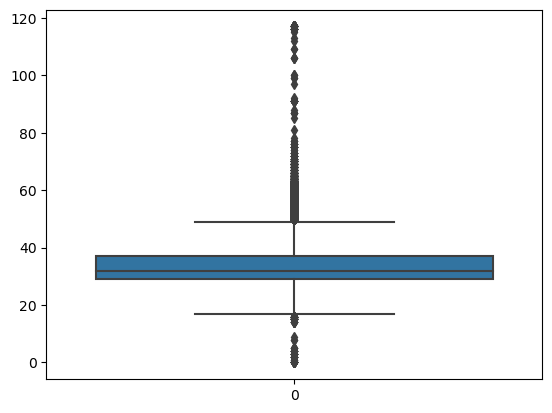

In [22]:
sns.boxplot(df['age'])
plt.show()

### #  Removing the outliers

In [23]:
# Using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3-Q1
print('Q1:',Q1)
print('Q3:',Q3)
print('IQR',IQR)

Q1: 29.0
Q3: 37.0
IQR 8.0


In [24]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

17.0
49.0


In [25]:
df_out = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)] # rows without outliers
df_out.shape

(180708, 12)

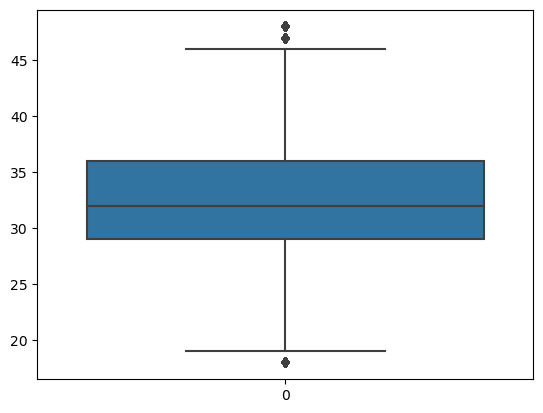

In [26]:
sns.boxplot(df_out.age)
plt.show()

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot. (2)


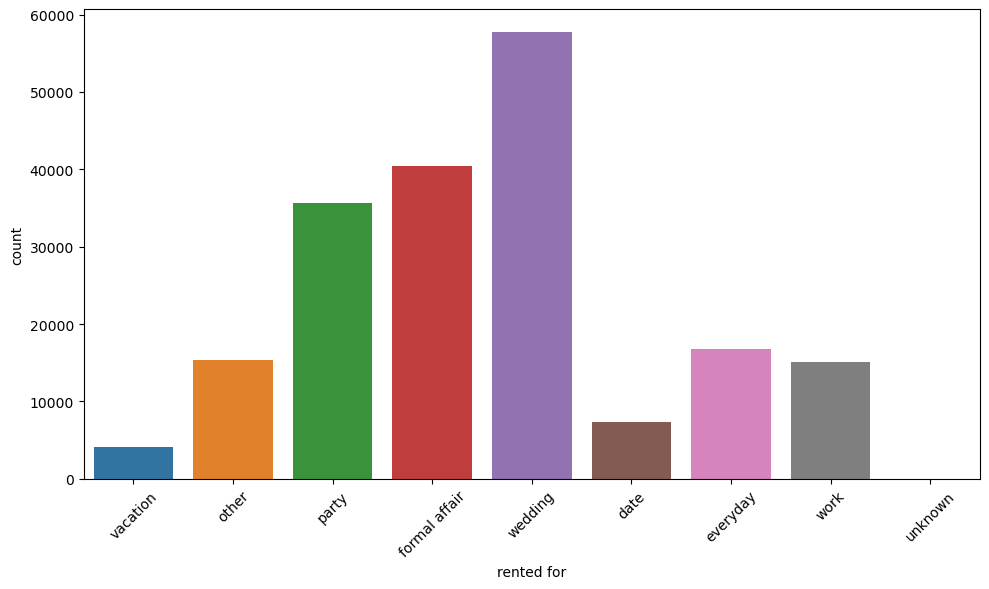

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='rented for')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Countplot is used to show distribution of categorical variables

### Data Preparation for model building: [ Score: 2 point ]


### 12.Encode the categorical variables in the dataset. (1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fit          192544 non-null  object 
 1   bust size    192544 non-null  object 
 2   item_id      192544 non-null  int64  
 3   weight       192544 non-null  float64
 4   rating       192544 non-null  float64
 5   rented for   192544 non-null  object 
 6   body type    192544 non-null  object 
 7   category     192544 non-null  object 
 8   height       192544 non-null  float64
 9   size         192544 non-null  int64  
 10  age          192544 non-null  float64
 11  review_date  192544 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 17.6+ MB


In [29]:
df.drop(columns=['review_date'],inplace=True)

In [30]:
df_cat=df.select_dtypes(include='object')
df_cat.head()

,fit,bust size,rented for,body type,category
0,fit,34d,vacation,hourglass,romper
1,fit,34b,other,straight & narrow,gown
2,fit,34b,party,hourglass,sheath
3,fit,34c,formal affair,pear,dress
4,fit,34b,wedding,athletic,gown


In [31]:
le=LabelEncoder()
for col in df_cat:
    df[col] = le.fit_transform(df[col])

In [32]:
df.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,0,39,2260466,137.0,10.0,6,3,44,68.0,14,28.0
1,0,37,153475,132.0,10.0,3,6,20,66.0,12,36.0
2,0,37,1063761,135.0,10.0,4,3,45,64.0,4,116.0
3,0,38,126335,135.0,8.0,2,4,16,65.0,8,34.0
4,0,37,616682,145.0,10.0,7,1,20,69.0,12,27.0


In [33]:
df_copy=df.copy()

### 13. Standardize the data, so that the values are within a particular range. (1)

In [34]:
df1=df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
scaled_features_df.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.004640,1.508460,-0.000957,0.634498,0.664564,0.020953,1.569310,1.011893,0.206575,-0.729154
1,-0.556291,-0.187210,-1.107903,-0.249202,0.634498,-0.536429,1.927582,-0.307247,0.259688,-0.028862,0.265991
2,-0.556291,-0.187210,0.022448,-0.100255,0.634498,-0.136098,0.020953,1.647500,-0.492517,-0.970608,10.217442
3,-0.556291,-0.095925,-1.141604,-0.100255,-0.764242,-0.936760,0.656496,-0.620006,-0.116415,-0.499735,0.017205
4,-0.556291,-0.187210,-0.532714,0.396235,0.634498,1.064895,-1.250132,-0.307247,1.387995,-0.028862,-0.853547


### ● Principal Component Analysis and Clustering: [ Score: 23 point ]


### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7)


In [35]:
#step 1:-calculate  covariance matrix
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00000519e+00  9.05525666e-03  2.36767713e-02  1.36712983e-02
  -2.45044635e-01  8.07892000e-03 -7.61016810e-03  3.35892077e-04
   1.44717645e-04  6.54006939e-02  1.59721574e-03]
 [ 9.05525666e-03  1.00000519e+00 -4.74223785e-02  5.68663389e-01
  -2.09457651e-02 -3.48625582e-03 -2.15702411e-01 -1.09647683e-02
   1.47036167e-01  6.27115858e-01  1.65476458e-01]
 [ 2.36767713e-02 -4.74223785e-02  1.00000519e+00 -3.08500948e-02
  -1.46500776e-03 -5.80892235e-02  7.42619903e-03  3.01331416e-01
   4.65669726e-03 -4.43115259e-02  2.63411272e-02]
 [ 1.36712983e-02  5.68663389e-01 -3.08500948e-02  1.00000519e+00
  -2.08485232e-02  8.83255831e-03 -2.34400313e-01 -1.44172746e-02
   3.49055850e-01  7.23391050e-01  6.29822084e-02]
 [-2.45044635e-01 -2.09457651e-02 -1.46500776e-03 -2.08485232e-02
   1.00000519e+00  1.28198258e-02  4.72965534e-03 -2.37071846e-02
   1.74835660e-03 -3.67286881e-02 -3.51310734e-02]
 [ 8.07892000e-03 -3.48625582e-03 -5.80892235e-02  8.83255831e-03

In [36]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 3.71247056e-02  5.28476460e-02  3.63270933e-02 -2.03977045e-01
   6.69219339e-01 -2.38140967e-01  6.54564555e-01 -1.32358853e-01
   8.53791455e-03 -4.75791294e-02 -5.16272274e-03]
 [ 4.96836768e-01  1.05418772e-01  7.89990646e-01  4.33712564e-03
  -1.85194887e-02  4.72597007e-02 -2.54365606e-02  1.74068954e-01
  -9.63699486e-02 -2.46064299e-01 -1.20738562e-01]
 [-4.22796727e-02 -1.77409420e-02  1.68515642e-02 -6.43536750e-01
  -2.06327770e-01  6.66925291e-01  2.33569474e-01 -1.34668869e-01
  -1.43836064e-01  4.41113032e-02 -2.80828876e-02]
 [ 5.42879639e-01  6.70028614e-01 -4.52727625e-01  1.17618502e-02
  -4.43212794e-02  4.75161633e-02 -2.14302585e-02 -1.09998854e-01
   2.15617573e-02 -5.53610210e-02 -1.75874367e-01]
 [-3.60044613e-02  7.47906288e-03 -1.24624526e-04  2.21775322e-01
  -6.65098068e-01 -2.33097524e-01  6.64645215e-01  1.82996059e-02
  -6.16747175e-02 -7.26905624e-02 -3.99713869e-02]
 [ 2.31417097e-04 -3.77996210e-03  1.55970348e-02  2.40843999e-01
  

In [37]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]#sorting eigenvectors in descending order
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

Variance Explained:  [23.20040527033615, 12.155023488970086, 11.247544502943413, 9.494031723696358, 8.894610440574958, 8.084030264988353, 7.640129184856686, 6.921446403687311, 6.2499103519819945, 3.7893946623984105, 2.323473705566274]
Cummulative Variance Explained:  [ 23.20040527  35.35542876  46.60297326  56.09700499  64.99161543
  73.07564569  80.71577488  87.63722128  93.88713163  97.67652629
 100.        ]


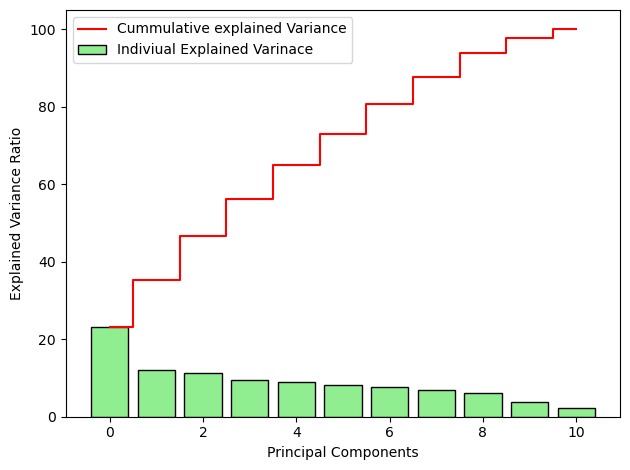

In [38]:
#plotting and choosing the optimal pc
plt.bar(range(11),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Varinace')
plt.step(range(11), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.legend(loc = 'best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

### We can see that 90-95% of variance is explained by the first 8 variables.
### So optimal principal component =8
​

In [39]:
## Fitting the PCA model
pca=PCA(n_components = 8)
pca.fit(scaled_features_df)

PCA(n_components=8)

In [40]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.146939,1.462657,-1.489827,-1.484549,0.682359,0.392711,0.334441,0.072371
1,-0.618702,-1.005948,-0.450409,0.818764,-0.761071,1.652373,0.530548,0.075111
2,0.491709,2.397138,-0.861844,7.860484,2.118438,-1.886349,5.159987,-0.542894
3,-0.505441,-0.859610,0.463999,0.693451,-1.165805,0.349537,0.024139,0.952102
4,0.668245,-1.166929,-0.771117,-1.701640,0.279438,-0.904039,0.610810,0.110946


### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)


### a. Find the optimal K Value using elbow plot for K Means clustering.

In [41]:
cluster_range=range(1,11)
cluster_errors=[]

for num_clusters in cluster_range:
    clusters=KMeans(num_clusters,n_init=8)
    clusters.fit(data_pca)
    labels=clusters.labels_
    centroids=clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df=pd.DataFrame({'num_clusters':cluster_range,
                         'cluster_errors':cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,1.856142e+06
1,2,1.556321e+06
2,3,1.414259e+06
3,4,1.294418e+06
4,5,1.198101e+06
5,6,1.133695e+06
6,7,1.077358e+06
7,8,1.028860e+06
8,9,9.989648e+05
9,10,9.683931e+05


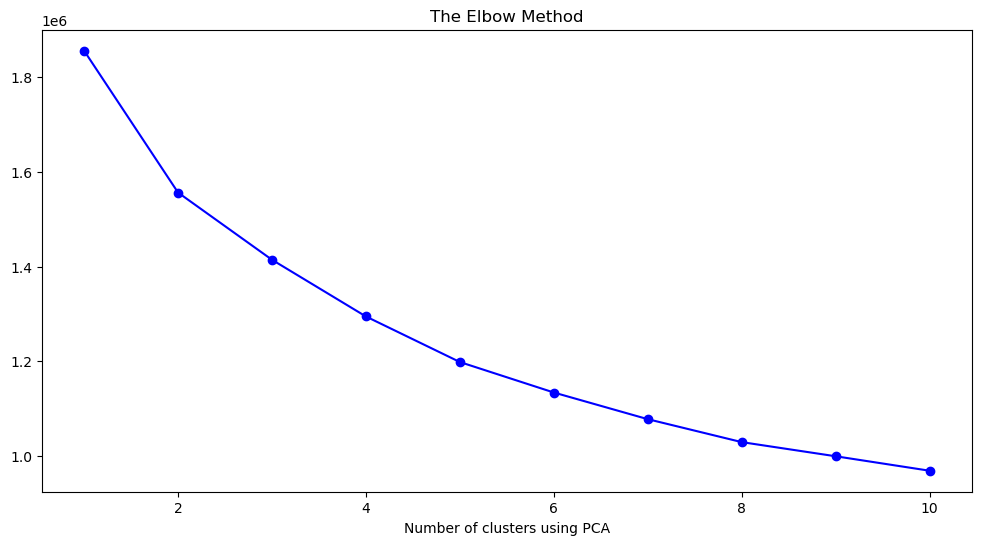

In [42]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

#### .From the Elbow plot, we can see that at K=4 the interia starts to drop significantly. So we will do clustering using 4 clusters..The clusters are labeled as 0,1,2,3.


In [43]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=4, n_init=8, random_state=100)
kmeans.fit(data_pca)

KMeans(n_clusters=4, n_init=8, random_state=100)

In [44]:
## obtained labels from kmeans clustering
kmeans.labels_

array([0, 2, 0, ..., 2, 3, 3])

In [45]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,0
1,2
2,0
3,2
4,2


In [66]:
df_labels['Labels'] = df_labels['Labels'].astype('category')

In [70]:
#joining labels dataframe with scaled data
kmeans_df=df.join(df_labels)
kmeans_df.head()

,fit,bust size,item_id,weight,rating,rented for,body type,category,height,size,age,Labels
0,0,39,2260466,137.0,10.0,6,3,44,68.0,14,28.0,0
1,0,37,153475,132.0,10.0,3,6,20,66.0,12,36.0,2
2,0,37,1063761,135.0,10.0,4,3,45,64.0,4,116.0,0
3,0,38,126335,135.0,8.0,2,4,16,65.0,8,34.0,2
4,0,37,616682,145.0,10.0,7,1,20,69.0,12,27.0,2


In [54]:
kmeans_df['Labels'].value_counts()

2    83959
3    47895
1    31394
0    29296
Name: Labels, dtype: int64

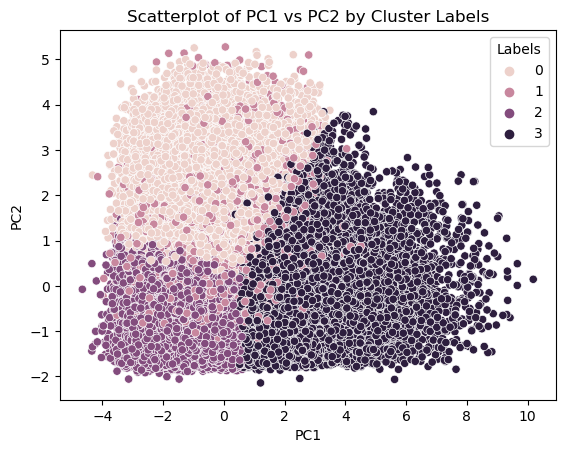

In [56]:
#visualising te clusters
sns.scatterplot(x=kmeans_df['PC1'], y=kmeans_df['PC2'], hue=kmeans_df['Labels'])
plt.title('Scatterplot of PC1 vs PC2 by Cluster Labels')
plt.show()

### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.


In [57]:
from sklearn.metrics import silhouette_score

kmeans_score=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans=kmeans.fit(data_pca.head(1000))
    labels=kmeans.predict(data_pca.head(1000))
    print(i,silhouette_score(data_pca.head(1000),labels))

2 0.14950764693160848
3 0.14788295567177653
4 0.15756142599739514
5 0.13409994596775174
6 0.12087446861243865
7 0.12782158724537282
8 0.1349605884819486
9 0.1327146075749482
10 0.1250953616863821


### From the silhouette score we can see the optimal clusters should be 4

###  16. Apply Agglomerative clustering and segment the data. (You may useoriginal data or PCA transformed data) (8)


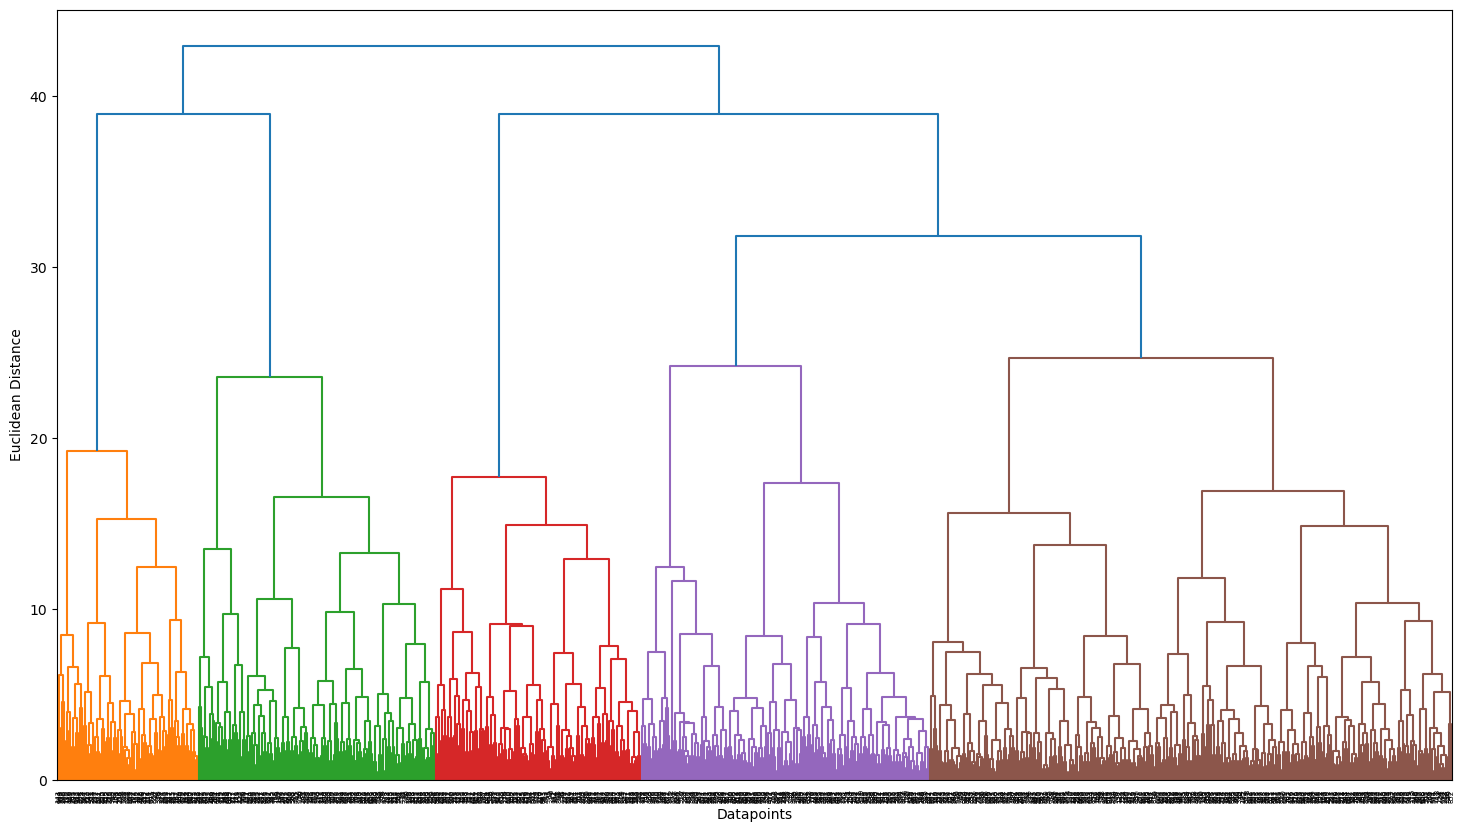

In [59]:
plt.figure(figsize=[18,10])
merg=linkage(data_pca.head(1000),method='ward')
dendrogram(merg,leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.show()

### a. Find the optimal K Value using dendrogram for Agglomerative clustering

In [61]:
#computing silhouette score to find optimal k
for i in range(2,11):
    hier =AgglomerativeClustering(n_clusters=i)
    hier=hier.fit(scaled_features_df.head(1000))
    labels=hier.fit_predict(scaled_features_df.head(1000))
    print(i,silhouette_score(scaled_features_df.head(1000),labels))


2 0.1256644276494982
3 0.1306723141302346
4 0.10842027215159625
5 0.05669396462103177
6 0.06553767014294197
7 0.07503002584750126
8 0.0681595851030449
9 0.07127111115651957
10 0.05744803529837574


### optimal k value could be 3

### b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.


In [62]:
hie_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hie_cluster_model=hie_cluster.fit(scaled_features_df.head(1000))

In [63]:
#creating dataframe of lables
df_label1=pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,0
2,0
3,0
4,0


### ● Conclusion : [ Score: 2 point ]
### 17. Perform cluster analysis by doing bivariate analysis between cluster labels
### and different features and write your conclusion on the results. (2)

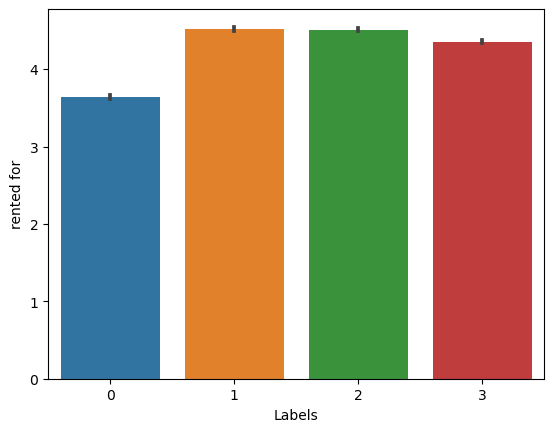

In [71]:
sns.barplot(x=kmeans_df['Labels'],y=kmeans_df['rented for'])
plt.show()

### The above barplot shows the different clusters of category of products that were rented for

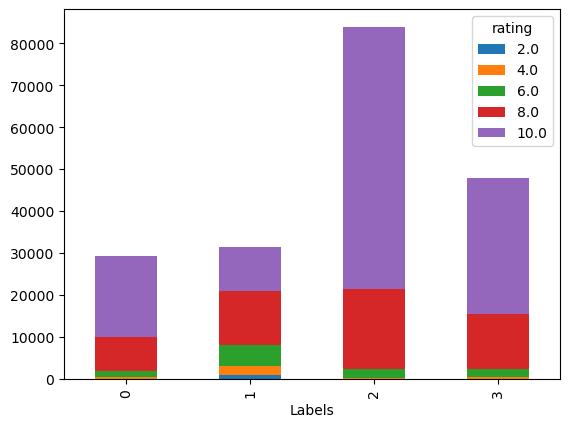

In [74]:
pd.crosstab(kmeans_df['Labels'],kmeans_df['rating']).plot(kind='bar',stacked=True)
plt.show()

### we see the products in label 2 have the highest rating of 10

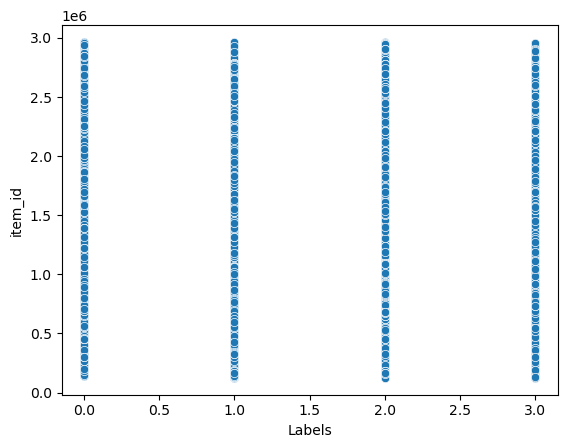

In [78]:
sns.scatterplot(x=kmeans_df['Labels'],y=kmeans_df['item_id'])
plt.show()